In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("imputed_data.csv")
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,pnc,r1iwy_d,r1iwm_d,r1lasidy,rabyear,rabmonth,ragender,r1phase,raeduc_l,r1illiterate,h1rural,r1lang_d,r1risk,r1distance,r1iwstat_d,r1wtresp,r1yr,r1fyr,r1season,r1fseason,r1date,r1fdate,r1dw,r1fdw,r1mo,r1fmo,r1orient_t5,r1state,r1fstate,r1city,r1fcity,r1floor,r1ffloor,r1name,r1fname,r1address,r1faddress,r1orient_p5,r1trial1,r1ftrial1,...,r1mna_wloss,r1mna_mob,r1mna_stress,r1mna_psycho,r1mna_screen,r1mna_protn,r1mna_fluid,r1mna_feed,r1mna_nstat,r1mna_hstat,r1mna_mac,r1mna_cc,r1mna_assess,r1mna_scale,r1hear_r,r1hear_l,r1hear_p,r1cdr_final,r1cdr_incon,r1cdr_mem1,r1cdr_ori1,r1cdr_jud1,r1cdr_com1,r1cdr_hom1,r1cdr_per1,r1cdr_scor1,r1cdr_mem2,r1cdr_ori2,r1cdr_jud2,r1cdr_com2,r1cdr_hom2,r1cdr_per2,r1cdr_scor2,r1cdr_mem3,r1cdr_ori3,r1cdr_jud3,r1cdr_com3,r1cdr_hom3,r1cdr_per3,r1cdr_scor3
0,2.0,2019.0,1.0,224.0,1950.0,11.0,2.0,2.0,0.0,1.0,1.0,11.0,1.0,3.0,1.0,1.122860,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,3.0,0.0,...,3.0,2.0,2.0,2.0,13.0,0.0,1.0,2.0,2.0,0.0,1.0,0.5,11.5,24.5,3.0,4.0,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.5
1,9.0,2019.0,1.0,224.0,1949.0,9.0,2.0,2.0,0.0,1.0,1.0,11.0,1.0,3.0,1.0,0.927889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,1.0,2.0,2.0,2.0,8.8,0.5,0.5,2.0,0.0,1.0,0.0,0.0,9.0,17.1,2.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.5
2,1.0,2019.0,1.0,223.0,1957.0,5.0,1.0,2.0,4.0,0.0,1.0,11.0,1.0,3.0,1.0,1.153473,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,3.0,0.0,...,1.0,2.0,2.0,2.0,9.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,6.5,15.5,5.0,5.0,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.0,0.5,0.5,1.0,0.5,0.0,0.5,0.5,0.5
3,1.0,2019.0,1.0,222.0,1957.0,11.0,1.0,2.0,0.0,0.0,1.0,11.0,1.0,3.0,1.0,1.152450,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.8,0.0,1.6,2.0,10.4,0.0,0.6,1.6,0.4,0.6,1.0,0.0,8.1,19.5,2.6,3.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,2.0,2.0,3.0,2.0,3.0,3.0,3.0
4,7.0,2019.0,1.0,222.0,1949.0,4.0,1.0,2.0,3.0,0.0,1.0,11.0,1.0,3.0,1.0,1.155471,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,3.0,0.0,...,3.0,2.0,2.0,2.0,11.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,8.0,19.0,4.0,3.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.5


In [ ]:
data['r1cdr_final'].value_counts()

0.5    1672
0.0     821
0.3     440
0.2     418
0.1     258
0.4     218
1.0     163
0.6      53
2.0      25
0.7      10
3.0       5
1.1       3
0.8       3
1.3       3
0.9       2
1.2       1
1.4       1
Name: r1cdr_final, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
y = data['r1cdr_final']
X = data.drop(['r1cdr_final'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

Text(0.5, 0, 'Random Forest Feature Importance')

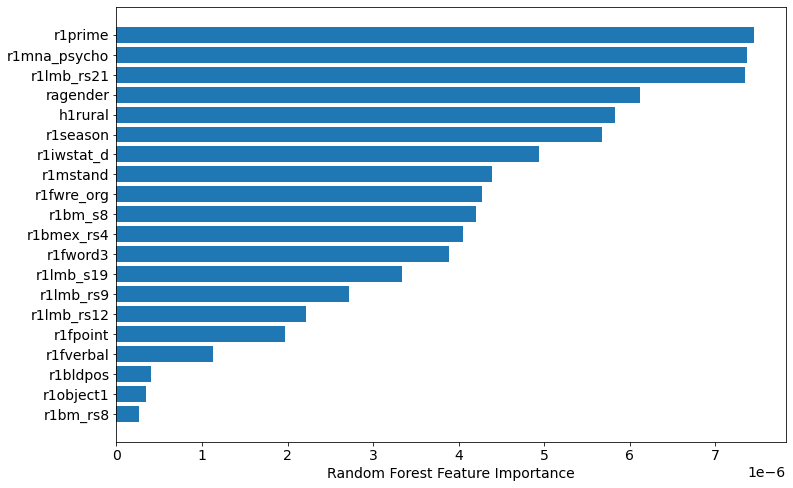

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
sorted_idx = sorted_idx[:20]
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
sorted_idx

array([ 97,  48, 337, 172, 204, 142, 139, 123,  66, 101,  82,  71, 343,
        14,  18,  10,   6, 150, 386, 164])

In [ ]:
X_train.columns[sorted_idx]

Index(['r1bm_rs8', 'r1object1', 'r1bldpos', 'r1fverbal', 'r1fpoint',
       'r1lmb_rs12', 'r1lmb_rs9', 'r1lmb_s19', 'r1fword3', 'r1bmex_rs4',
       'r1bm_s8', 'r1fwre_org', 'r1mstand', 'r1iwstat_d', 'r1season',
       'h1rural', 'ragender', 'r1lmb_rs21', 'r1mna_psycho', 'r1prime'],
      dtype='object')

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

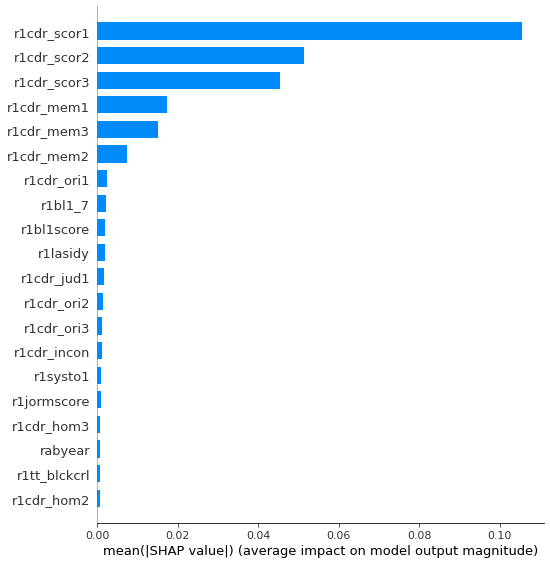

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


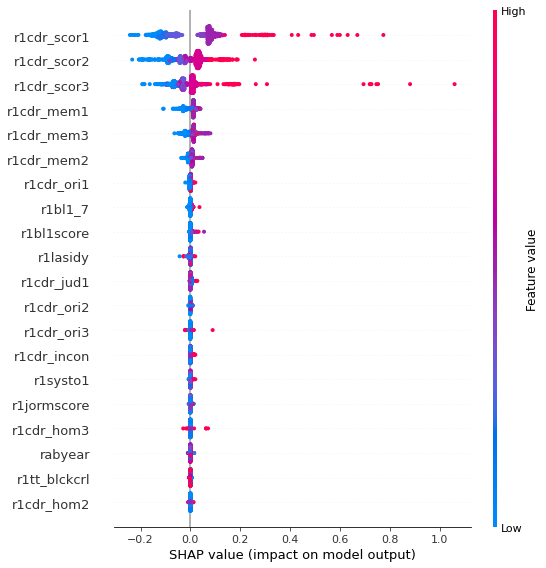

In [ ]:
shap.summary_plot(shap_values, X_test)


In [ ]:
variables_to_consider = set(list(X_train.columns[sorted_idx])).union(set(['r1cdr_scor1','r1cdr_scor2','r1cdr_scor3','r1cdr_mem1','r1cdr_mem2','r1cdr_mem3','r1cdr_ori1']))

In [ ]:
variables_to_consider

{'h1rural',
 'r1bldpos',
 'r1bm_rs8',
 'r1bm_s8',
 'r1bmex_rs4',
 'r1cdr_mem1',
 'r1cdr_mem2',
 'r1cdr_mem3',
 'r1cdr_ori1',
 'r1cdr_scor1',
 'r1cdr_scor2',
 'r1cdr_scor3',
 'r1fpoint',
 'r1fverbal',
 'r1fword3',
 'r1fwre_org',
 'r1iwstat_d',
 'r1lmb_rs12',
 'r1lmb_rs21',
 'r1lmb_rs9',
 'r1lmb_s19',
 'r1mna_psycho',
 'r1mstand',
 'r1object1',
 'r1prime',
 'r1season',
 'ragender'}

In [ ]:
len(variables_to_consider)

27

In [ ]:
final_dataframe = data[variables_to_consider]
final_dataframe['Target'] = data['r1cdr_final']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
final_dataframe.head()

,r1iwstat_d,r1fwre_org,r1cdr_mem1,r1mstand,r1lmb_rs21,ragender,r1lmb_s19,r1season,r1bmex_rs4,r1cdr_mem3,r1fword3,r1cdr_scor3,r1mna_psycho,r1object1,r1bldpos,r1bm_rs8,r1lmb_rs9,r1cdr_ori1,r1cdr_scor2,r1fpoint,r1bm_s8,r1lmb_rs12,r1cdr_mem2,h1rural,r1prime,r1fverbal,r1cdr_scor1,Target
0,1.0,0.0,0.5,1.0,0.0,2.0,0.0,1.0,0.0,0.5,0.0,0.5,2.0,1.0,2.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.5,1.0,1.0,0.0,0.5,0.5
1,1.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.5,2.0,1.0,2.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.5,1.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,0.5,2.0,1.0,2.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.5
3,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0,0.0,2.0,0.0,0.0,2.0,0.5,1.0,0.0,0.0,0.5,1.0,0.0,1.0,2.0,2.0
4,1.0,0.0,0.5,1.0,0.0,1.0,0.0,1.0,0.0,0.5,0.0,0.5,2.0,1.0,2.0,2.0,0.0,0.0,0.5,0.0,2.0,0.0,0.5,1.0,1.0,0.0,0.5,0.5


In [ ]:
final_dataframe.to_csv("final_data.csv",index=False)